In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("exoplanet_data.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')

# Drop the null rows
df = df.dropna()
df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


# Select your features (columns)

In [5]:
# Set features. This will also be used as your x values.
X = df.drop("koi_disposition", axis = 1)
y = df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [6]:
y.value_counts()

FALSE POSITIVE    3504
CONFIRMED         1800
CANDIDATE         1687
Name: koi_disposition, dtype: int64

In [7]:
target_names = ["CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,8.268081,6.340000e-07,-6.340000e-07,135.056330,0.000064,-0.000064,...,-190,4.502,0.050,-0.200,0.922,0.273,-0.091,292.53125,46.728699,15.768
5191,0,0,0,0,11.161938,1.677000e-04,-1.677000e-04,133.553800,0.013000,-0.013000,...,-124,4.072,0.188,-0.101,1.640,0.281,-0.343,295.21268,49.562180,13.374
5226,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,0.000088,-0.000088,...,-458,3.896,0.270,-0.180,2.867,0.988,-1.087,297.18176,45.988441,10.622
5390,1,0,0,0,3.343285,4.380000e-05,-4.380000e-05,134.845100,0.011200,-0.011200,...,-197,3.773,0.293,-0.098,2.652,0.433,-0.939,296.86258,41.147419,13.276


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Label encode your data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [12]:
print(encoded_y_test)

[2 0 2 ... 1 1 1]


# Train the Model



In [16]:
from sklearn.svm import SVC
model = SVC(kernel = "linear")
model.fit(X_train_scaled, encoded_y_train)
y_predictions = model.predict(X_test_scaled)
model

SVC(kernel='linear')

In [17]:
print(f"Training Data Score: {model.score(X_train_scaled, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, encoded_y_test)}")

Training Data Score: 0.8455082967766546
Testing Data Score: 0.8415331807780321


In [18]:
from sklearn.metrics import classification_report
print(classification_report(encoded_y_test, y_predictions, target_names = target_names))

                precision    recall  f1-score   support

     CANDIDATE       0.70      0.62      0.66       411
     CONFIRMED       0.71      0.76      0.73       484
FALSE POSITIVE       0.98      1.00      0.99       853

      accuracy                           0.84      1748
     macro avg       0.80      0.79      0.79      1748
  weighted avg       0.84      0.84      0.84      1748



In [20]:
prediction_labels = label_encoder.inverse_transform(y_predictions)

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [21]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {"C": [1, 5, 10, 50], 
              "gamma": [0.0001, 0.0005, 0.001, 0.005]
             }
grid = GridSearchCV(model, param_grid, verbose = 3)

In [22]:
# Train the model with GridSearch
grid.fit(X_train_scaled, encoded_y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .................C=1, gamma=0.0001;, score=0.858 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0001;, score=0.833 total time=   0.2s
[CV 3/5] END .................C=1, gamma=0.0001;, score=0.855 total time=   0.2s
[CV 4/5] END .................C=1, gamma=0.0001;, score=0.832 total time=   0.2s
[CV 5/5] END .................C=1, gamma=0.0001;, score=0.835 total time=   0.2s
[CV 1/5] END .................C=1, gamma=0.0005;, score=0.858 total time=   0.2s
[CV 2/5] END .................C=1, gamma=0.0005;, score=0.833 total time=   0.2s
[CV 3/5] END .................C=1, gamma=0.0005;, score=0.855 total time=   0.2s
[CV 4/5] END .................C=1, gamma=0.0005;, score=0.832 total time=   0.2s
[CV 5/5] END .................C=1, gamma=0.0005;, score=0.835 total time=   0.2s
[CV 1/5] END ..................C=1, gamma=0.001;, score=0.858 total time=   0.2s
[CV 2/5] END ..................C=1, gamma=0.001;

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [23]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 50, 'gamma': 0.0001}
0.8823155822702828


In [24]:
#create dataframe to compare our model's prediction performance
prediction_df = pd.DataFrame(
    {
        "Predictive Diagnosis": prediction_labels, 
        "Actual Diagnosis": y_test
    })
prediction_df

,Predictive Diagnosis,Actual Diagnosis
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
...,...,...
4006,CANDIDATE,CANDIDATE
6985,CANDIDATE,CANDIDATE
1468,CONFIRMED,CONFIRMED
5138,CANDIDATE,CONFIRMED


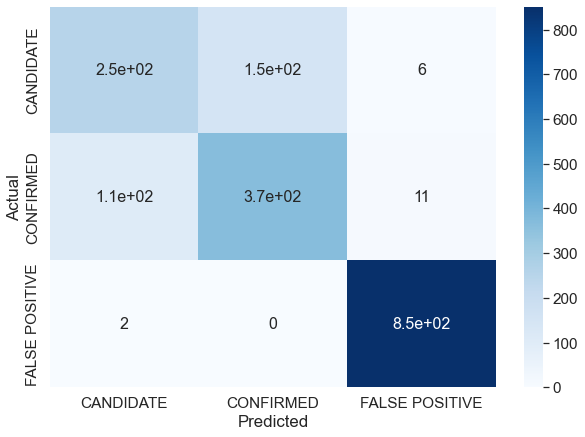

In [25]:
#plot confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

data = confusion_matrix(y_test, prediction_labels)
df_cm = pd.DataFrame(data, columns = np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize = (10, 7))
sns.set(font_scale = 1.4)
confusion_matrix_plot = sns.heatmap(df_cm, cmap = "Blues", annot = True, annot_kws = {"size": 16})

# Save the Model

In [27]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'SVC_Model.sav'
joblib.dump(model, filename)

['SVC_Model.sav']